In [2]:
# Initial imports.
import pandas as pd
import numpy as np
# from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt

In [3]:
# Import our input dataset
url = 'https://raw.githubusercontent.com/Lalita-ponnapalli/HS_Baseball_Scholarships/main/allstudentactivities1718final.csv'
schdist_df = pd.read_csv(url)
schdist_df.head()

,id,year,revtotal,member,overallaccountscore,activitysum,revperstudent,diststudachievescore,diststudentgrowthscore,pctlep,...,pctecondisad,insttype,largegroupby,groupbyvalue,groupcount,studentcount,schoolname,initenroll,instloc,instlevel
0,7,2017-18,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,...,0.685,Public,All Students,All Students,31,12,Abbotsford Middle/Senior High,First Fall,In-State,2-Year
1,7,2017-18,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,...,0.685,Public,All Students,All Students,31,6,Abbotsford Middle/Senior High,First Fall,In-State,4-Year
2,7,2017-18,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,...,0.685,Public,All Students,All Students,31,4,Abbotsford Middle/Senior High,First Fall,In-State,Multiple
3,7,2017-18,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,...,0.685,Public,All Students,All Students,31,3,Abbotsford Middle/Senior High,Second Fall,In-State,2-Year
4,7,2017-18,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,...,0.685,Public,All Students,All Students,31,1,Abbotsford Middle/Senior High,Second Fall,In-State,4-Year


In [4]:
schdist_df = schdist_df.drop(columns=['year', 'schoolname', 'id', 'largegroupby', 'groupbyvalue', 'insttype'])

In [5]:
# Create LabelEncoder instance
labelencoder = LabelEncoder()

# Encode 'initenroll' column
schdist_df['initenrollcode'] = labelencoder.fit_transform(schdist_df['initenroll'])
schdist_df = schdist_df.drop(columns=['initenroll'])
schdist_df

,revtotal,member,overallaccountscore,activitysum,revperstudent,diststudachievescore,diststudentgrowthscore,pctlep,pctwhite,pctswd,pctecondisad,groupcount,studentcount,instloc,instlevel,initenrollcode
0,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,12,In-State,2-Year,0
1,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,6,In-State,4-Year,0
2,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,4,In-State,Multiple,0
3,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,3,In-State,2-Year,2
4,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,1,In-State,4-Year,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,3,Multiple,Multiple,0
4366,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,4,Out-of-State,4-Year,0
4367,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,In-State,2-Year,1
4368,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,In-State,4-Year,1


In [6]:
# Encode 'instlevel' column
schdist_df['instlevelcode'] = labelencoder.fit_transform(schdist_df['instlevel'])
schdist_df = schdist_df.drop(columns=['instlevel'])
schdist_df

,revtotal,member,overallaccountscore,activitysum,revperstudent,diststudachievescore,diststudentgrowthscore,pctlep,pctwhite,pctswd,pctecondisad,groupcount,studentcount,instloc,initenrollcode,instlevelcode
0,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,12,In-State,0,0
1,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,6,In-State,0,1
2,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,4,In-State,0,2
3,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,3,In-State,2,0
4,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,1,In-State,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,3,Multiple,0,2
4366,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,4,Out-of-State,0,1
4367,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,In-State,1,0
4368,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,In-State,1,1


In [7]:
# Encode 'instloc' column
schdist_df['instloccode'] = labelencoder.fit_transform(schdist_df['instloc'])
schdist_df = schdist_df.drop(columns=['instloc'])
schdist_df

,revtotal,member,overallaccountscore,activitysum,revperstudent,diststudachievescore,diststudentgrowthscore,pctlep,pctwhite,pctswd,pctecondisad,groupcount,studentcount,initenrollcode,instlevelcode,instloccode
0,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,12,0,0,0
1,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,6,0,1,0
2,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,4,0,2,0
3,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,3,2,0,0
4,9963425.41,771,76.3,553604.0,12922.730752,50.6,69.9,0.308,0.493,0.130,0.685,31,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,3,0,2,1
4366,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,4,0,1,2
4367,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,1,0,0
4368,15548503.74,1325,84.2,1120235.0,11734.719804,88.1,73.6,0.050,0.876,0.102,0.200,100,1,1,1,0


In [8]:
schdist_df[:] = np.nan_to_num(schdist_df)

In [9]:
# Define the features set.
X = schdist_df.copy()
X = X.drop("revperstudent", axis=1)
X.head()

,revtotal,member,overallaccountscore,activitysum,diststudachievescore,diststudentgrowthscore,pctlep,pctwhite,pctswd,pctecondisad,groupcount,studentcount,initenrollcode,instlevelcode,instloccode
0,9963425.41,771.0,76.3,553604.0,50.6,69.9,0.308,0.493,0.13,0.685,31.0,12.0,0.0,0.0,0.0
1,9963425.41,771.0,76.3,553604.0,50.6,69.9,0.308,0.493,0.13,0.685,31.0,6.0,0.0,1.0,0.0
2,9963425.41,771.0,76.3,553604.0,50.6,69.9,0.308,0.493,0.13,0.685,31.0,4.0,0.0,2.0,0.0
3,9963425.41,771.0,76.3,553604.0,50.6,69.9,0.308,0.493,0.13,0.685,31.0,3.0,2.0,0.0,0.0
4,9963425.41,771.0,76.3,553604.0,50.6,69.9,0.308,0.493,0.13,0.685,31.0,1.0,2.0,1.0,0.0


In [10]:
schdist_df.columns

Index(['revtotal', 'member', 'overallaccountscore', 'activitysum',
       'revperstudent', 'diststudachievescore', 'diststudentgrowthscore',
       'pctlep', 'pctwhite', 'pctswd', 'pctecondisad', 'groupcount',
       'studentcount', 'initenrollcode', 'instlevelcode', 'instloccode'],
      dtype='object')

In [11]:
# Define the target set.
y = schdist_df["revperstudent"].ravel()
y[:5]

array([12922.73075227, 12922.73075227, 12922.73075227, 12922.73075227,
       12922.73075227])

In [12]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 

In [15]:
X_train_scaled.astype('float32')

array([[ 0.02043715,  0.07256612, -0.6054226 , ...,  0.45322752,
        -1.0933856 , -0.8009749 ],
       [-0.4166852 , -0.43126455,  0.24902362, ..., -0.73495376,
         0.1789953 , -0.8009749 ],
       [-0.4139019 , -0.43557653,  1.3475974 , ...,  0.45322752,
        -1.0933856 , -0.8009749 ],
       ...,
       [-0.38837138, -0.40539262,  0.05914668, ...,  1.6414088 ,
        -1.0933856 , -0.8009749 ],
       [-0.03034643, -0.00320168, -0.09004235, ..., -0.73495376,
         1.4513761 ,  0.37923858],
       [-0.40767133, -0.4228086 ,  0.50671375, ...,  0.45322752,
        -1.0933856 , -0.8009749 ]], dtype=float32)

In [16]:
# Fixing nan and infinite values
np.nan_to_num(X_train_scaled)

array([[ 0.02043715,  0.07256612, -0.60542261, ...,  0.45322751,
        -1.09338555, -0.80097492],
       [-0.41668519, -0.43126455,  0.24902362, ..., -0.73495373,
         0.17899529, -0.80097492],
       [-0.41390191, -0.43557654,  1.34759734, ...,  0.45322751,
        -1.09338555, -0.80097492],
       ...,
       [-0.38837139, -0.40539262,  0.05914668, ...,  1.64140876,
        -1.09338555, -0.80097492],
       [-0.03034643, -0.00320168, -0.09004234, ..., -0.73495373,
         1.45137613,  0.37923857],
       [-0.40767133, -0.42280857,  0.50671375, ...,  0.45322751,
        -1.09338555, -0.80097492]])

In [17]:
y_train.astype('float32')

array([13115.869, 11809.745, 13854.032, ..., 13479.786, 13572.817,
       12455.454], dtype=float32)

In [18]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [19]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test_scaled)

In [20]:
# show mean absolute error and mean squared error
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  22.645235439130985
MSE:  15630.478635047859


In [21]:
# Verify model doesn't overfit (0.75 to 1.0 is acceptable)
rf_oob = RandomForestRegressor(oob_score=True)
rf_oob.fit(X_train_scaled, y_train)
print(rf_oob.oob_score_)

0.9933322281947379


In [22]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([1.64239360e-01, 3.09965114e-01, 2.71380717e-02, 5.20564537e-02,
       3.40472544e-02, 1.04493049e-01, 3.67926185e-02, 1.34138875e-01,
       4.02431520e-02, 6.92306516e-02, 2.71886576e-02, 2.31409593e-04,
       8.32745697e-05, 5.45030990e-05, 9.75551887e-05])

In [23]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3099651139582639, 'member'),
 (0.16423936031455869, 'revtotal'),
 (0.13413887514060788, 'pctwhite'),
 (0.10449304863349738, 'diststudentgrowthscore'),
 (0.06923065163280401, 'pctecondisad'),
 (0.05205645368826377, 'activitysum'),
 (0.040243152015411204, 'pctswd'),
 (0.03679261851052376, 'pctlep'),
 (0.03404725440026632, 'diststudachievescore'),
 (0.027188657597032536, 'groupcount'),
 (0.027138071658385075, 'overallaccountscore'),
 (0.00023140959299296717, 'studentcount'),
 (9.755518866995777e-05, 'instloccode'),
 (8.32745697211566e-05, 'initenrollcode'),
 (5.450309900146048e-05, 'instlevelcode')]

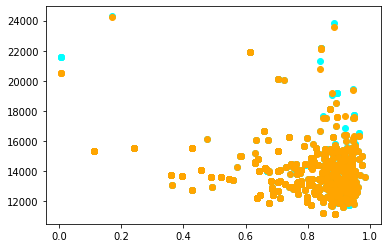

In [24]:
plt.scatter(X_test['pctwhite'].values, y_test, color = 'cyan')
plt.scatter(X_test['pctwhite'].values, y_pred, color = "orange")
# plt.title
# plt.xlabel
# plt.ylabel
plt.show()

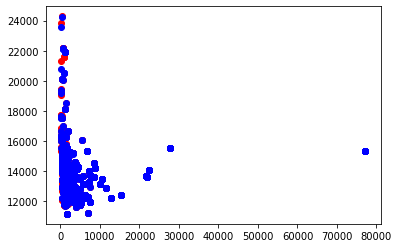

In [26]:
plt.scatter(X_test['member'].values, y_test, color = 'red')
plt.scatter(X_test['member'].values, y_pred, color = "blue")
# plt.title
# plt.xlabel
# plt.ylabel
plt.show()

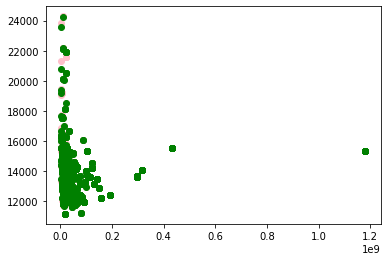

In [29]:
plt.scatter(X_test['revtotal'].values, y_test, color = 'pink')
plt.scatter(X_test['revtotal'].values, y_pred, color = "green")
# plt.title
# plt.xlabel
# plt.ylabel
plt.show()